<a href="https://colab.research.google.com/github/Ashritha-lopelli/pyspark/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [33]:
num_points_each_cluster = 100
mu1 = [-0.4, 3]
covar1 = [[1.3,0], [0,1]]
mu2 = [0.5, 0.75]
covar2 = [[2.2,1.2], [1.8,2.1]]
X1 = np.random.multivariate_normal(mu1, covar1, num_points_each_cluster)
X2 = np.random.multivariate_normal(mu2, covar2, num_points_each_cluster)
y1 = np.ones(num_points_each_cluster)
y2 = np.zeros(num_points_each_cluster)

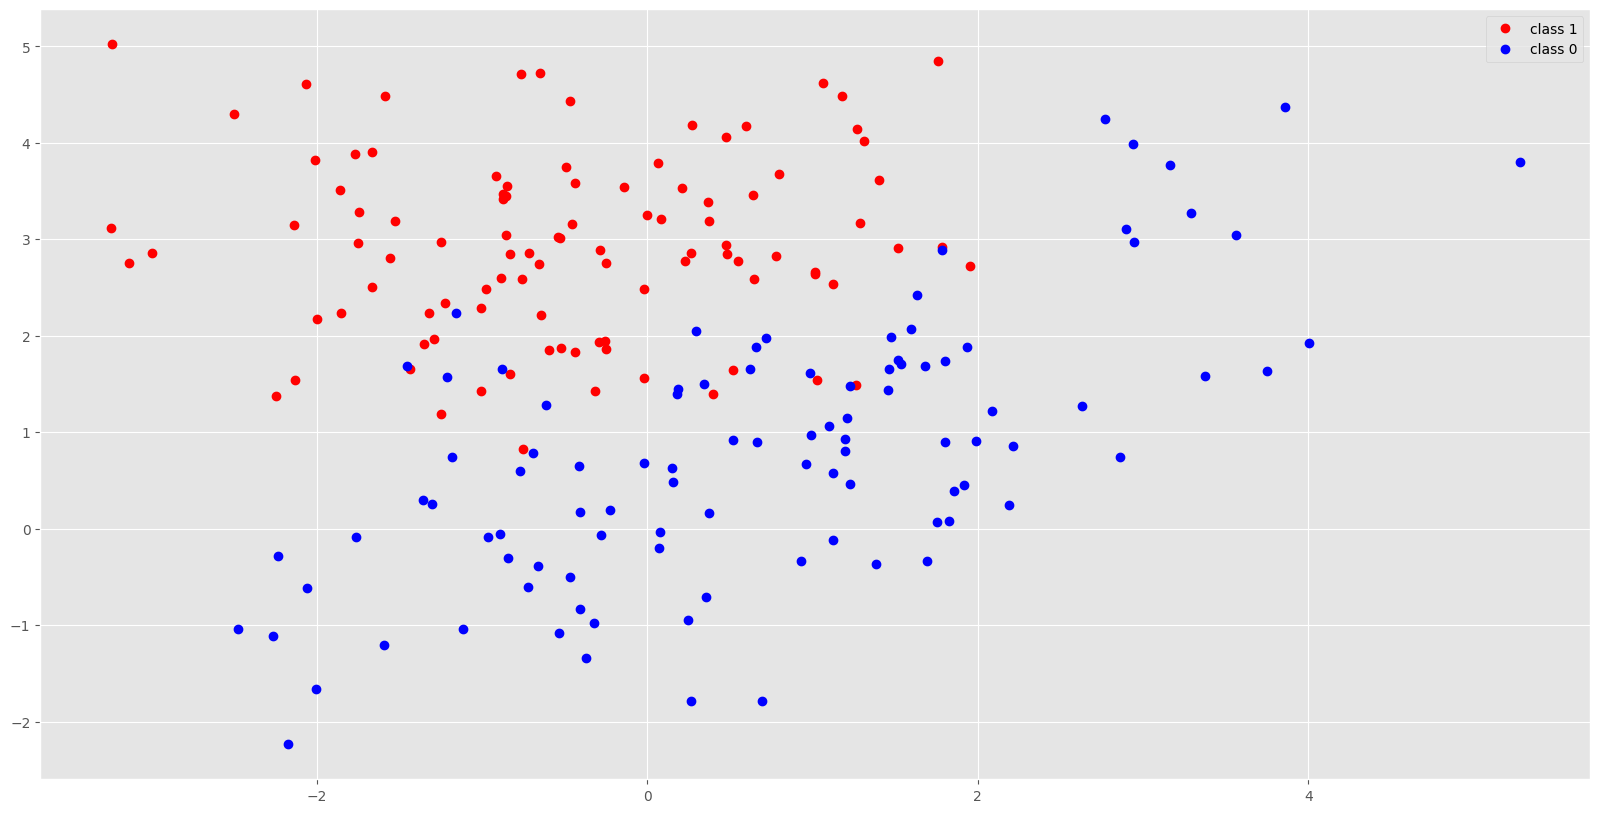

In [34]:
plt.plot(X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.legend(loc='best')
plt.show()

In [35]:
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))
print (X.shape, y.shape)


(200, 2) (200,)


In [60]:
X_tf = tf.constant(X)
y_tf = tf.constant(y)

In [38]:
def predict(X_t, y_t, x_t, k_t):
    neg_one = tf.constant(-1.0, dtype=tf.float64)
    # we compute the L-1 distance
    distances =  tf.reduce_sum(tf.abs(tf.subtract(X_t, x_t)), 1)
    # to find the nearest points, we find the farthest points based on negative distances
    # we need this trick because tensorflow has top_k api and no closest_k or reverse=True api
    neg_distances = tf.multiply(distances, neg_one)
    # get the indices
    vals, indx = tf.nn.top_k(neg_distances, k_t)
    # slice the labels of these points
    y_s = tf.gather(y_t, indx)
    return y_s


def get_label(preds):
    counts = np.bincount(preds.astype('int64'))
    return np.argmax(counts)

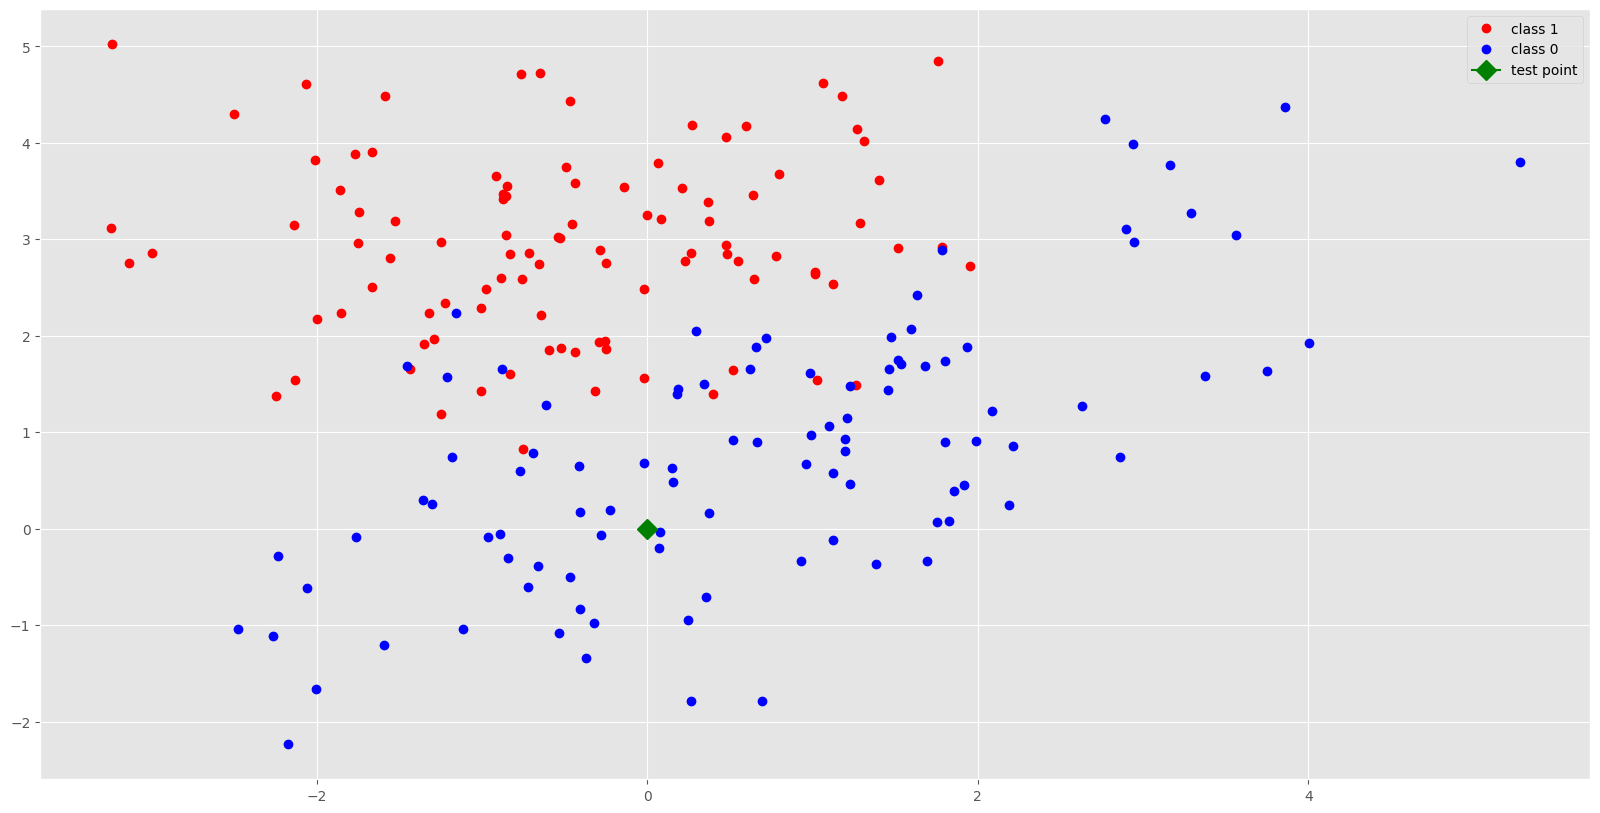

In [39]:
example = np.array([0, 0])
example_tf = tf.constant(example,dtype=tf.float64)

plt.plot( X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.plot(example[0], example[1], 'g', marker='D', markersize=10, label='test point')
plt.legend(loc='best')
plt.show()

In [62]:
import tensorflow as tf
k_tf = tf.constant(3)
tf.compat.v1.disable_v2_behavior()

with tf.compat.v1.Session() as sesss:
   pr = predict(X_tf, y_tf, example_tf, k_tf)
   sess = tf.compat.v1.Session()
   y_index = sess.run(pr)
   print (get_label(y_index))
   # print(sess.run(pr))

0


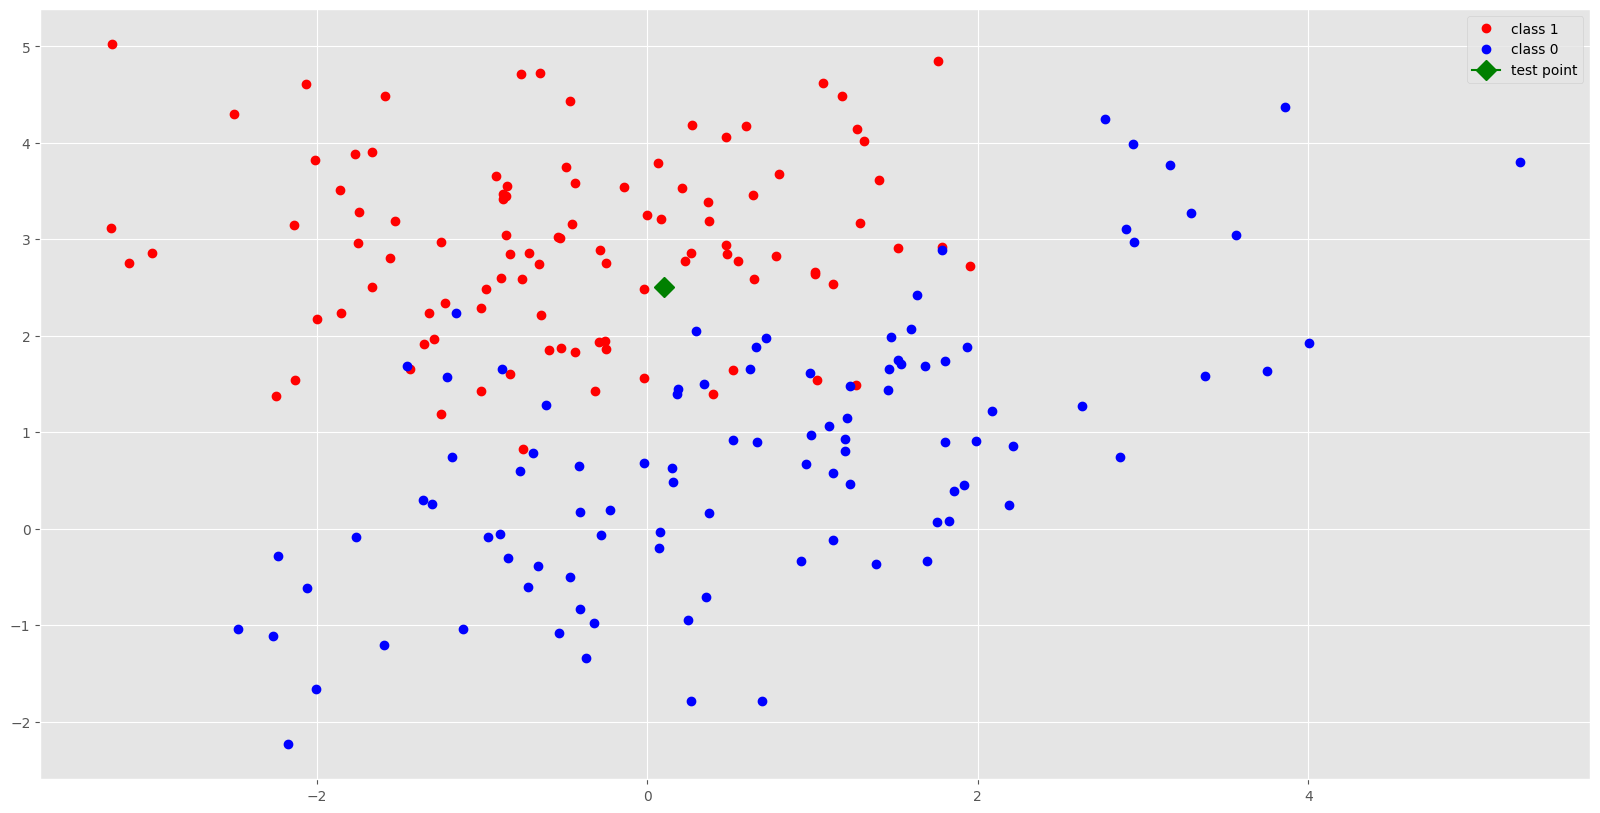

In [63]:
example_2 = np.array([0.1, 2.5])
example_2_tf = tf.constant(example_2)
plt.plot( X1[:, 0], X1[:,1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:,1], 'bo', label='class 0')
plt.plot(example_2[0], example_2[1], 'g', marker='D', markersize=10, label='test point')
plt.legend(loc='best')
plt.show()

# New Section

In [59]:
pr = predict(X_tf, y_tf, example_2_tf, k_tf)
y_index = sess.run(pr)
print (get_label(y_index))

1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [50]:
! ls


sample_data


In [49]:
!pwd

/content


In [52]:
! ls

sample_data


In [53]:
! cd sample_data/

In [54]:
! ls

sample_data


In [55]:
! jupyter nbconvert --to html sample_data/knn.ipynb

[NbConvertApp] Converting notebook sample_data/knn.ipynb to html
[NbConvertApp] Writing 769843 bytes to sample_data/knn.html
